# Demo: Cross-Image Attention for Zero-Shot Appearance Transfer
<b>Paper:</b> https://arxiv.org/abs/2311.03335  
<b>Project Page:</b> https://garibida.github.io/cross-image-attention/   
<b>Code:</b> https://github.com/garibida/cross-image-attention

<a href="https://colab.research.google.com/github/garibida/cross-image-attention/blob/main/notebooks/demo.ipynb"><img align="left" title="Open in Colab" src="https://colab.research.google.com/assets/colab-badge.svg"></a>

In [1]:
import os
import sys
# sys.path.append("/content/cross-image-attention")


In [2]:
!pip install jax==0.4.19
!pip install jaxlib==0.4.19
!pip install diffusers==0.19.3
!pip install pyrallis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.87 requires jax>=0.4.27, but you have jax 0.4.19 which is incompatible.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.19 which is incompatible.
optax 0.2.4 requires jax>=0.4.27, but you have jax 0.4.19 which is incompatible.
orbax-checkpoint 0.6.4 requires jax>=0.4.26, but you have jax 0.4.19 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
ERROR: pip's dependency resolver does

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import torch
from pathlib import Path
from PIL import Image
from IPython.display import display

from config import RunConfig
from run import run

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [50]:
app_image_path = "/content/hands_v.png"
struct_image_path = "/content/bonn_frame_0026.jpg"
# domain_name = "animal" # @param {type: "string"}
seed = 42

from typing import NamedTuple, Optional

class Range(NamedTuple):
    start: int
    end: int

config = RunConfig(
        app_image_path = Path(app_image_path),
        struct_image_path =Path(struct_image_path),
        # value_mask_path=Path("/content/left_hand_mask.png"),
        # value_scale = 3.5,
        # query_mask_path=Path("/content/left_hand_mask.png"),
        # query_scale = 7.5,
        use_masked_adain=False,
        seed=42,
        domain_name="a woman",
        prompt=None,
        load_latents=True,
        skip_steps=30,
        num_timesteps=100,
        cross_attn_32_range=Range(start=10,end=10),
        cross_attn_64_range=Range(start=10,end=60),
        adain_range=Range(start=25,end=45),
        swap_guidance_scale=3,
        contrast_strength=1.67,

)

Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Done.
Loading existing latents...
Done.
Running appearance transfer...


100%|██████████| 70/70 [01:08<00:00,  1.03it/s]


Done.


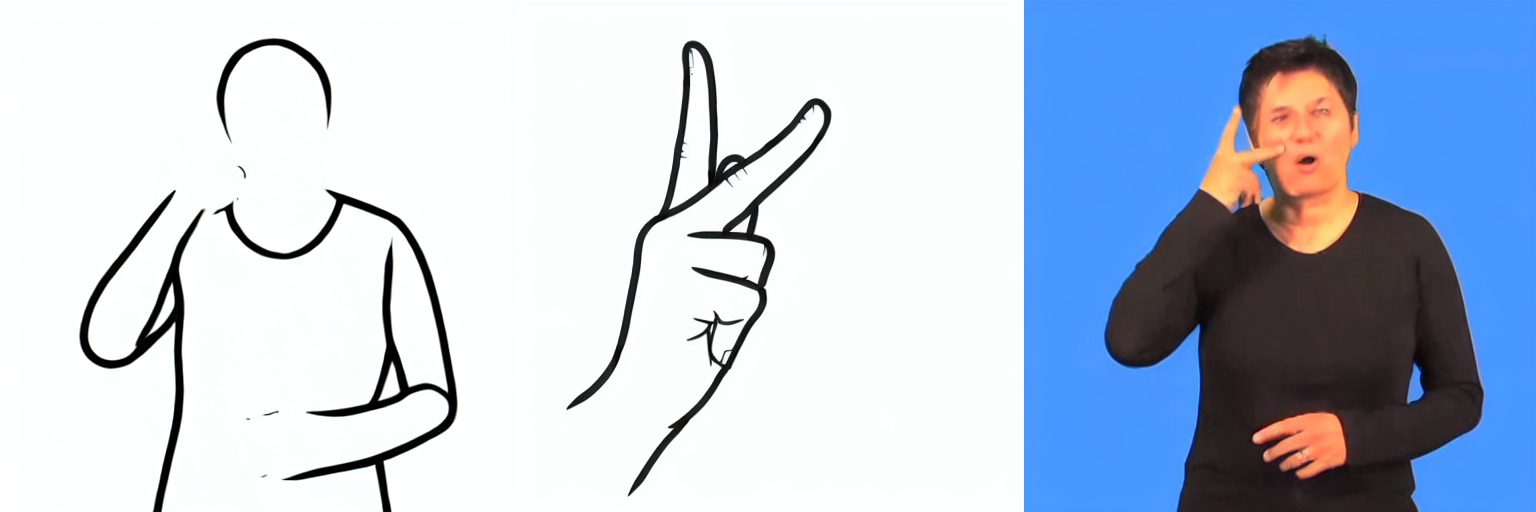

In [51]:
images = run(cfg=config)
torch.cuda.empty_cache()
joined_images = Image.fromarray(np.concatenate(images, axis=1))
display(joined_images)

Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Done.
Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Done.
Loading existing latents...
Done.
Running appearance transfer...


100%|██████████| 70/70 [01:11<00:00,  1.02s/it]


Done.


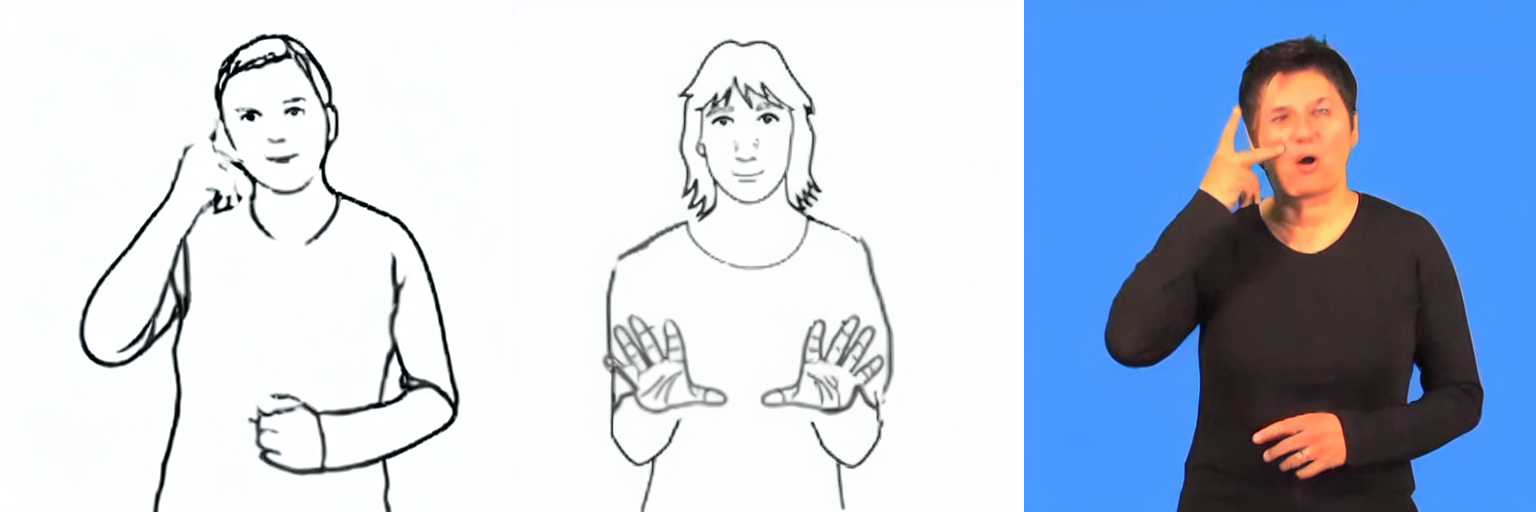

In [27]:
app_image_path = "/content/fangen.jpg"
struct_image_path = "/content/bonn_frame_0026.jpg"
# domain_name = "animal" # @param {type: "string"}
seed = 42

from typing import NamedTuple, Optional

class Range(NamedTuple):
    start: int
    end: int

config = RunConfig(
        app_image_path = Path(app_image_path),
        struct_image_path =Path(struct_image_path),
        query_mask_path=Path("/content/left_hand_mask.png"),
        use_masked_adain=False,
        seed=42,
        domain_name="a woman",
        prompt=None,
        load_latents=True,
        skip_steps=30,
        num_timesteps=100,
        cross_attn_32_range=Range(start=10,end=10),
        cross_attn_64_range=Range(start=0,end=70),
        adain_range=Range(start=25,end=45),
        swap_guidance_scale=3.5,
        contrast_strength=1.67,
        query_scale = 3.5

)

from appearance_transfer_model import AppearanceTransferModel
model = AppearanceTransferModel(config)

images = run(cfg=config)
torch.cuda.empty_cache()
joined_images = Image.fromarray(np.concatenate(images, axis=1))
display(joined_images)

In [26]:
app_image_path = "/content/fangen.jpg"
struct_image_path = "/content/bonn_frame_0026.jpg"
# domain_name = "animal" # @param {type: "string"}
seed = 42

from typing import NamedTuple, Optional

class Range(NamedTuple):
    start: int
    end: int

config = RunConfig(
        app_image_path = Path(app_image_path),
        struct_image_path =Path(struct_image_path),
        query_mask_path=Path("/content/left_hand_mask.png"),
        use_masked_adain=False,
        seed=42,
        domain_name="a woman",
        prompt=None,
        load_latents=True,
        skip_steps=30,
        num_timesteps=100,
        cross_attn_32_range=Range(start=10,end=10),
        cross_attn_64_range=Range(start=0,end=70),
        adain_range=Range(start=25,end=45),
        swap_guidance_scale=3.5,
        contrast_strength=1.67,
        query_scale

SyntaxError: incomplete input (<ipython-input-26-7f12d396661e>, line 28)